In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import sample
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [1]:
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df1=pd.read_csv("accidents_2005_to_2007.csv")
df2=pd.read_csv("accidents_2009_to_2011.csv")
df3=pd.read_csv("accidents_2012_to_2014.csv")

C:\Users\mehme\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
big_df=pd.concat([df1,df2,df3])

In [7]:
big_df.tail()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014
464696,2.01E+12,314072.0,579971.0,-3.348426,55.106700,98,3,2,2,24/12/2014,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [24]:
#month1={"month": []}
#month1=pd.DataFrame(data=month1)

In [25]:
#month1["month"] = pd.DatetimeIndex(df1["Date"]).month

<AxesSubplot:xlabel='Year', ylabel='count'>

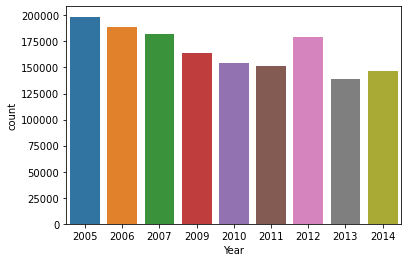

In [5]:
sns.countplot(data=big_df,x="Year")

In [6]:
big_df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

<AxesSubplot:xlabel='Urban_or_Rural_Area', ylabel='count'>

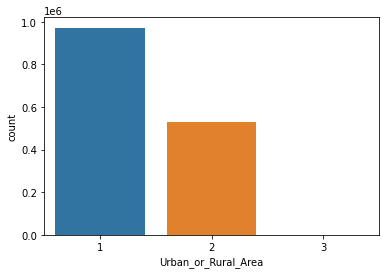

In [7]:
sns.countplot(data=big_df,x="Urban_or_Rural_Area")

In [8]:
#Kazaların büyük çoğunluğu kentsel bölgelerde olmuş

<AxesSubplot:xlabel='Urban_or_Rural_Area', ylabel='count'>

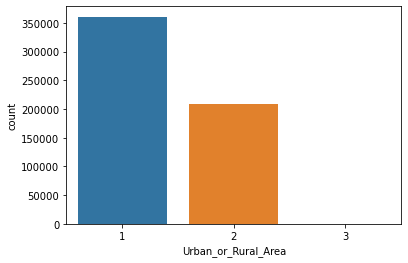

In [8]:
sns.countplot(data=df1,x="Urban_or_Rural_Area")

<AxesSubplot:xlabel='Urban_or_Rural_Area', ylabel='count'>

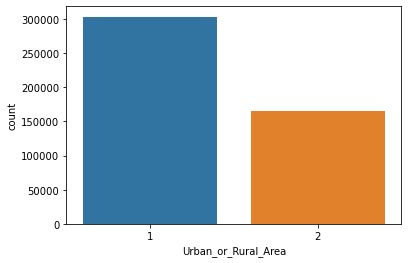

In [9]:
sns.countplot(data=df2,x="Urban_or_Rural_Area")

<AxesSubplot:xlabel='Urban_or_Rural_Area', ylabel='count'>

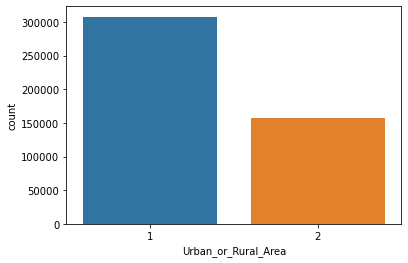

In [10]:
sns.countplot(data=df3,x="Urban_or_Rural_Area")

In [61]:
#zamanla kırsal kesimdeki kaza oranı düşmüş.Bunun sebebi zamanla kırsal alanların azalması olabilir.

<AxesSubplot:xlabel='Urban_or_Rural_Area', ylabel='count'>

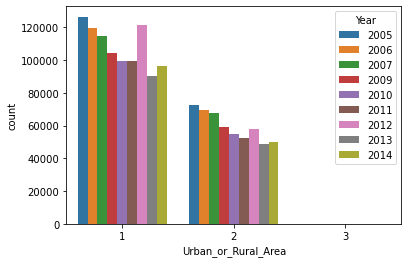

In [11]:
sns.countplot(data=big_df,x="Urban_or_Rural_Area",hue="Year")

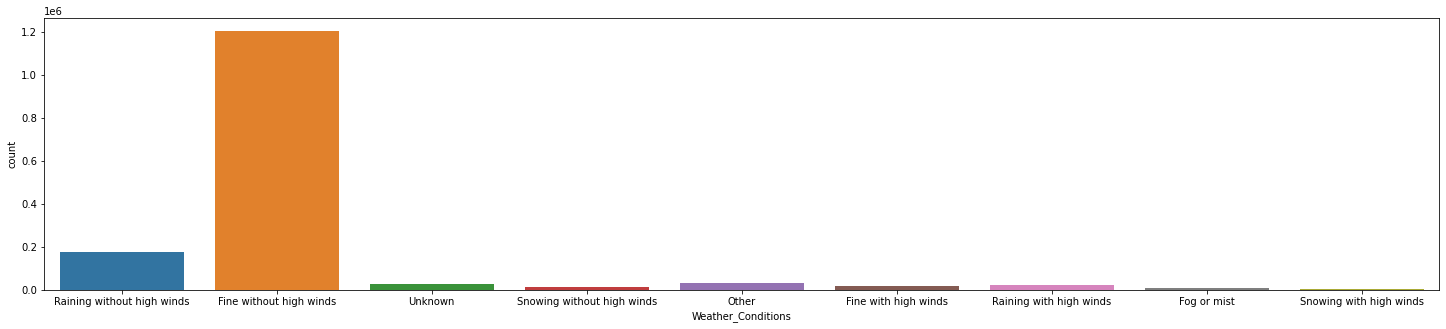

In [12]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.countplot(data=big_df,x="Weather_Conditions")
plt.show()

In [69]:
#Verilerde yağışlı günlerden ziyade günün yağışsız ve sert rüzgarsız geçtiği zamanlardaki kaza oranı daha fazla gözüküyor.
#Yağmurlu günler de diğer hava durumlarna böre daha fazla kazaya sebep olmuş.

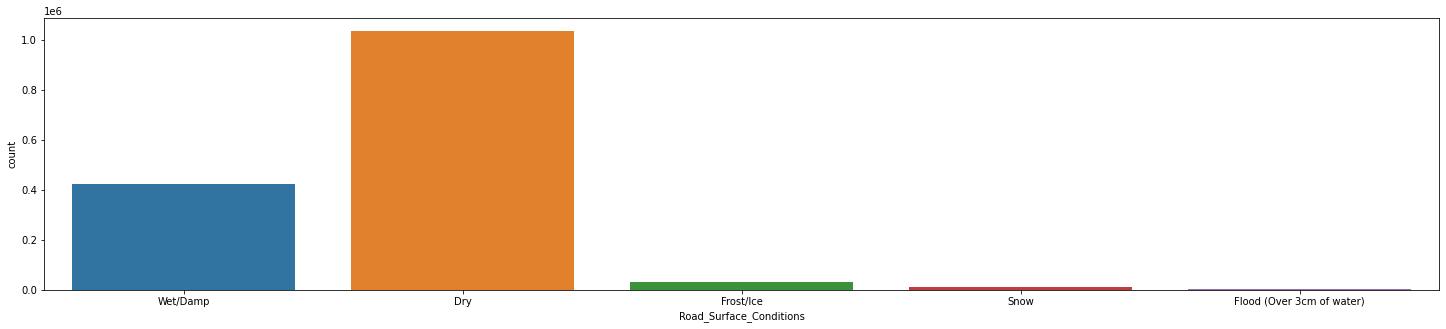

In [13]:
fig, ax = plt.subplots(figsize=(25, 5))
sns.countplot(data=big_df,x="Road_Surface_Conditions")
plt.show()

<AxesSubplot:ylabel='Year'>

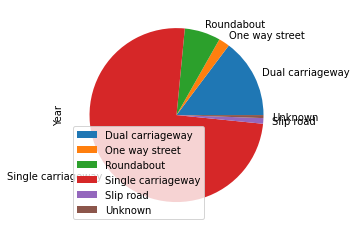

In [20]:
big_df.groupby(["Road_Type"]).sum().plot(kind='pie',y="Year")

In [23]:
#Kazanların çoğunluğu aynı anda tek bir aracın geçebildiği yollarda olmuş.

<AxesSubplot:xlabel='Accident_Severity', ylabel='Speed_limit'>

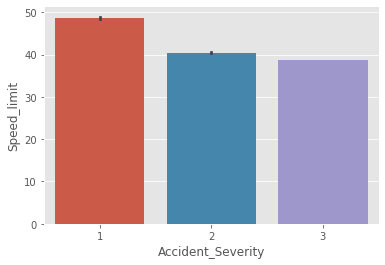

In [68]:
sns.barplot(data=big_df,x="Accident_Severity",y="Speed_limit")

In [69]:
#Hız limiti arttıkça kaza şiddeti de artmış.

<AxesSubplot:xlabel='Speed_limit', ylabel='count'>

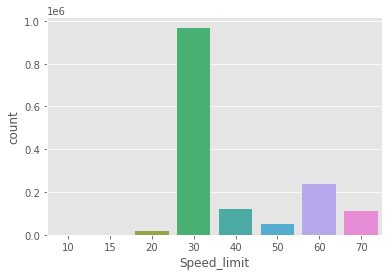

In [80]:
sns.countplot(data=big_df,x="Speed_limit")

In [81]:
#Hız limitinin 30 olduğu yollarda daha fazla kaza gerçekleşmiş.

In [86]:
big_df["Carriageway_Hazards"].unique()

array(['None', 'Other object in carriageway',
       'Pedestrian in carriageway (not injured)',
       'Dislodged vehicle load in carriageway',
       'Involvement with previous accident',
       'Any animal (except a ridden horse)', nan], dtype=object)

<AxesSubplot:xlabel='Light_Conditions', ylabel='count'>

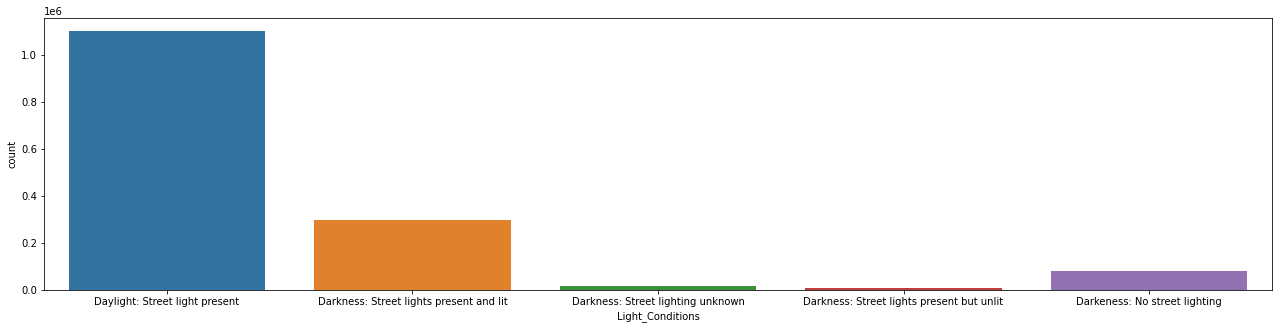

In [11]:
fig,ax=plt.subplots(figsize=(22,5))
sns.countplot(data=big_df,x="Light_Conditions")

In [12]:
#Kazaların çoğu gün ışığının olduğu zamanlarda gerçekleşmiş.

In [15]:
big_df["Junction_Control"].unique()

array([nan, 'Automatic traffic signal', 'Giveway or uncontrolled',
       'Stop Sign', 'Authorised person'], dtype=object)

<AxesSubplot:xlabel='Junction_Control', ylabel='count'>

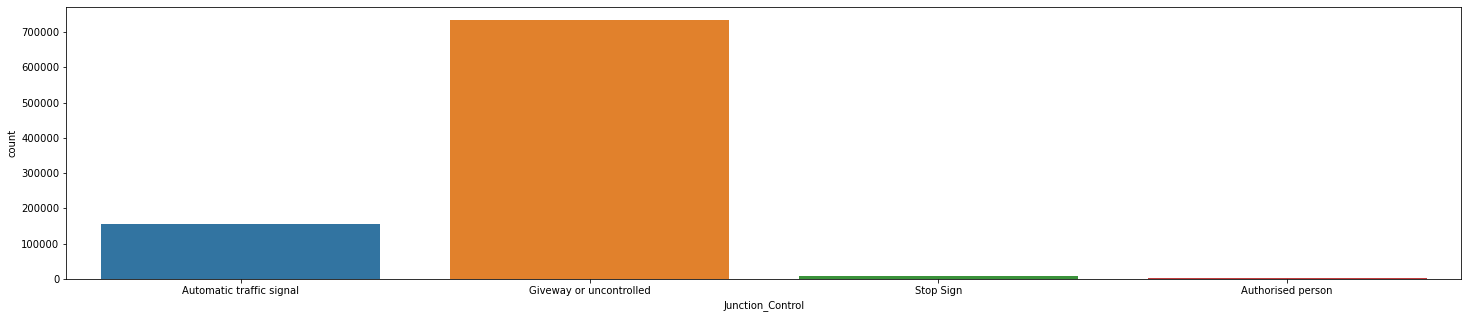

In [17]:
fig,x=plt.subplots(figsize=(25,5))
sns.countplot(data=big_df,x="Junction_Control")

In [18]:
#Kazaların çoğu yol geçişinin herhangi bir kontrole bağlı olmadığı(serbest) yollarda gerçekleşmiş.

In [20]:
big_df["Pedestrian_Crossing-Human_Control"].unique()

array(['None within 50 metres', 'Control by other authorised person',
       'Control by school crossing patrol', nan], dtype=object)

<AxesSubplot:xlabel='Pedestrian_Crossing-Human_Control', ylabel='count'>

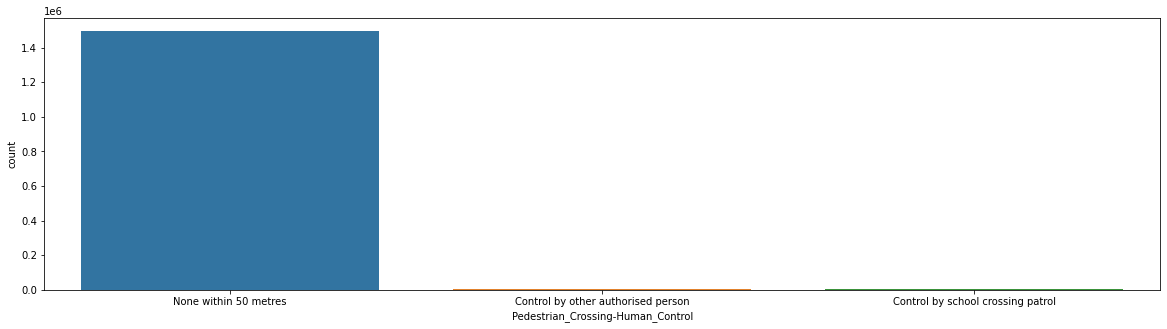

In [23]:
fig,ax=plt.subplots(figsize=(20,5))
sns.countplot(data=big_df,x="Pedestrian_Crossing-Human_Control")

In [24]:
#########################################################################################

## Kaza Tahmini

In [25]:
big_df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [33]:
big_df["Carriageway_Hazards"].unique()

array(['None', 'Other object in carriageway',
       'Pedestrian in carriageway (not injured)',
       'Dislodged vehicle load in carriageway',
       'Involvement with previous accident',
       'Any animal (except a ridden horse)', nan], dtype=object)

In [5]:
new_df=big_df.drop(["Accident_Index","Location_Easting_OSGR","Location_Northing_OSGR",
                   "Longitude","Time","Date","Local_Authority_(District)","Local_Authority_(Highway)",
                   "1st_Road_Class","1st_Road_Number","Junction_Detail","Junction_Control","2nd_Road_Class",
                   "2nd_Road_Number","Pedestrian_Crossing-Physical_Facilities","Special_Conditions_at_Site","Carriageway_Hazards",
                   "LSOA_of_Accident_Location","Latitude","Pedestrian_Crossing-Human_Control","Year"],axis=1)

In [6]:
new_df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,1,2,1,1,3,Single carriageway,30,Daylight: Street light present,Raining without high winds,Wet/Damp,1,Yes
1,1,3,1,1,4,Dual carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes
2,1,3,2,1,5,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes
3,1,3,1,1,6,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1,Yes
4,1,3,1,1,2,Single carriageway,30,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
464692,98,2,2,1,1,Dual carriageway,70,Darkeness: No street lighting,Snowing without high winds,Snow,2,Yes
464693,98,3,2,2,5,Dual carriageway,70,Darkeness: No street lighting,Fine without high winds,Snow,2,Yes
464694,98,3,1,1,3,Single carriageway,40,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2,Yes
464695,98,2,3,2,4,Single carriageway,60,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,Yes


In [7]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [8]:
new_df["Road_Type"] = le.fit_transform(new_df.Road_Type)

In [9]:
new_df["Light_Conditions"] = le.fit_transform(new_df.Light_Conditions)

In [10]:
new_df["Weather_Conditions"] = le.fit_transform(new_df.Weather_Conditions)

In [11]:
new_df["Road_Surface_Conditions"] = le.fit_transform(new_df.Road_Surface_Conditions)

In [12]:
new_df["Did_Police_Officer_Attend_Scene_of_Accident"] = le.fit_transform(new_df.Did_Police_Officer_Attend_Scene_of_Accident)

In [13]:
new_df["Speed_limit"] = le.fit_transform(new_df.Speed_limit)

In [14]:
new_df

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,1,2,1,1,3,3,3,4,5,4,1,1
1,1,3,1,1,4,0,3,2,1,0,1,1
2,1,3,2,1,5,3,3,2,1,0,1,1
3,1,3,1,1,6,3,3,4,1,0,1,1
4,1,3,1,1,2,3,3,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
464692,98,2,2,1,1,0,7,0,7,3,2,1
464693,98,3,2,2,5,0,7,0,1,3,2,1
464694,98,3,1,1,3,3,4,2,1,2,2,1
464695,98,2,3,2,4,3,6,0,5,4,2,1


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 12 columns):
 #   Column                                       Non-Null Count    Dtype
---  ------                                       --------------    -----
 0   Police_Force                                 1504150 non-null  int64
 1   Accident_Severity                            1504150 non-null  int64
 2   Number_of_Vehicles                           1504150 non-null  int64
 3   Number_of_Casualties                         1504150 non-null  int64
 4   Day_of_Week                                  1504150 non-null  int64
 5   Road_Type                                    1504150 non-null  int32
 6   Speed_limit                                  1504150 non-null  int64
 7   Light_Conditions                             1504150 non-null  int32
 8   Weather_Conditions                           1504150 non-null  int32
 9   Road_Surface_Conditions                      1504150 non-null  int32


In [16]:
y=new_df["Accident_Severity"]

In [17]:
X=new_df.drop("Accident_Severity",axis=1)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, auc, roc_curve, recall_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB

In [73]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)


In [74]:
y_pred2=nb_model.predict(X_test)

In [76]:
accuracy_score(y_test, y_pred2)

0.8009673237376591